In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [260]:
data = {
    "Hours_studied":[2,3,4,5,6,7,8,9,10,11,3,5,7,8,9,10,11,6,4,5],
    "Attendence": [60,65,70,75,80,85,90,92,95,98,70,75,80,85,88,92,96,83,78,74],
    "Sleep_Hours":[4,5,6,6,7,8,8,5,6,7,5,6,7,7,8,8,9,6,5,7],
    "Assignments_Completed": [4,5,6,6,7,8,9,10,10,10,5,6,7,8,9,10,10,8,6,7]
}

In [261]:
rng = np.random.default_rng()
data["Final_Score"]=(
    3*np.array(data["Hours_studied"])+
    0.4*np.array(data["Attendence"])+
    2*np.array(data["Assignments_Completed"])+
    rng.standard_normal(20)*3
)

In [262]:
df = pd.DataFrame(data)
df.head()

,Hours_studied,Attendence,Sleep_Hours,Assignments_Completed,Final_Score
0,2,60,4,4,36.524261
1,3,65,5,5,39.740119
2,4,70,6,6,53.894830
3,5,75,6,6,50.732037
4,6,80,7,7,66.523044


In [263]:
X = df[["Hours_studied","Attendence","Sleep_Hours","Assignments_Completed"]]
y = df["Final_Score"]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 14
Test set size: 6


In [264]:
model = LinearRegression()
model.fit(X_train,y_train)

y_prediction = model.predict(X_test)

print("Training values",X_train,y_train)
print("tested_values",X_test,y_prediction)

Training values     Hours_studied  Attendence  Sleep_Hours  Assignments_Completed
11              5          75            6                      6
3               5          75            6                      6
18              4          78            5                      6
16             11          96            9                     10
13              8          85            7                      8
2               4          70            6                      6
9              11          98            7                     10
19              5          74            7                      7
4               6          80            7                      7
12              7          80            7                      7
7               9          92            5                     10
10              3          70            5                      5
14              9          88            8                      9
6               8          90            8                  

In [265]:
print("Mean Squared Error:", mean_squared_error(y_test, y_prediction))
print("R² Score:", r2_score(y_test, y_prediction))

Mean Squared Error: 7.845339454877334
R² Score: 0.9807433249218188


In [266]:
tree_model = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_model.fit(X_train, y_train)

y_tree_pred = tree_model.predict(X_test)

print("Decision Tree (Depth=2) - Mean Squared Error:", mean_squared_error(y_test, y_tree_pred))
print("Decision Tree (Depth=2) - R² Score:", r2_score(y_test, y_tree_pred))


Decision Tree (Depth=2) - Mean Squared Error: 135.22179835454105
Decision Tree (Depth=2) - R² Score: 0.6680931080959267


In [267]:
deep_tree_model = DecisionTreeRegressor(max_depth=10, random_state=42)
deep_tree_model.fit(X_train, y_train)

y_deep_pred = deep_tree_model.predict(X_test)

print("High-Depth Decision Tree - Mean Squared Error:", mean_squared_error(y_test, y_deep_pred))
print("High-Depth Decision Tree - R² Score:", r2_score(y_test, y_deep_pred))


High-Depth Decision Tree - Mean Squared Error: 60.85990711028433
High-Depth Decision Tree - R² Score: 0.8506171130960504


In [268]:
print("Mean Squared Error:", mean_squared_error(y_test, y_prediction))
print("R² Score:", r2_score(y_test, y_prediction))
print()
print("Decision Tree (Depth=2) - Mean Squared Error:", mean_squared_error(y_test, y_tree_pred))
print("Decision Tree (Depth=2) - R² Score:", r2_score(y_test, y_tree_pred))
print()
print("High-Depth Decision Tree - Mean Squared Error:", mean_squared_error(y_test, y_deep_pred))
print("High-Depth Decision Tree - R² Score:", r2_score(y_test, y_deep_pred))


Mean Squared Error: 7.845339454877334
R² Score: 0.9807433249218188

Decision Tree (Depth=2) - Mean Squared Error: 135.22179835454105
Decision Tree (Depth=2) - R² Score: 0.6680931080959267

High-Depth Decision Tree - Mean Squared Error: 60.85990711028433
High-Depth Decision Tree - R² Score: 0.8506171130960504


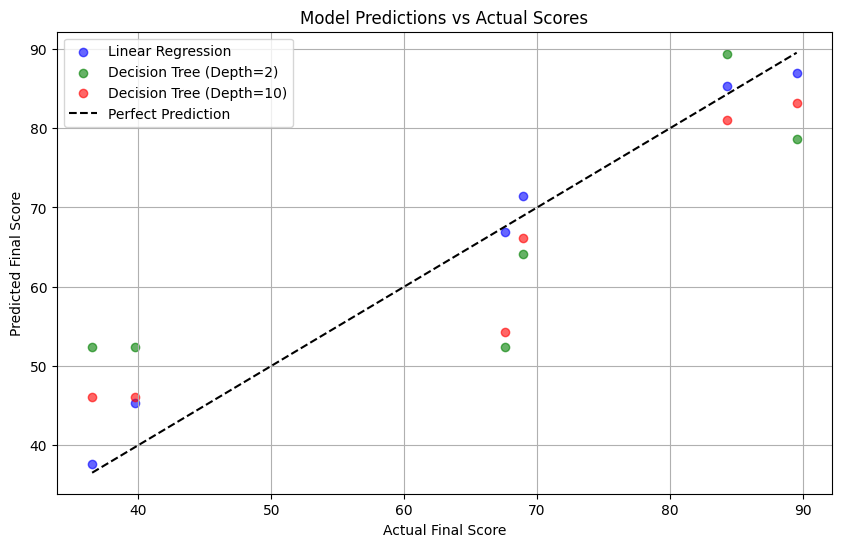

In [269]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_prediction, color='blue', label='Linear Regression', alpha=0.6)


plt.scatter(y_test, y_tree_pred, color='green', label='Decision Tree (Depth=2)', alpha=0.6)


plt.scatter(y_test, y_deep_pred, color='red', label='Decision Tree (Depth=10)', alpha=0.6)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')


plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Model Predictions vs Actual Scores')
plt.legend()
plt.grid(True)
plt.show()



In [270]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Linear Regression": y_prediction,
    "Decision Tree (Depth=2)": y_tree_pred,
    "Decision Tree (Depth=10)": y_deep_pred
})

print(comparison_df.round(2))


   Actual  Linear Regression  Decision Tree (Depth=2)  \
0   36.52              37.63                    52.43   
1   67.58              66.87                    52.43   
2   89.54              86.97                    78.63   
3   39.74              45.34                    52.43   
4   84.32              85.37                    89.33   
5   68.95              71.47                    64.11   

   Decision Tree (Depth=10)  
0                     46.02  
1                     54.28  
2                     83.21  
3                     46.02  
4                     81.03  
5                     66.14  


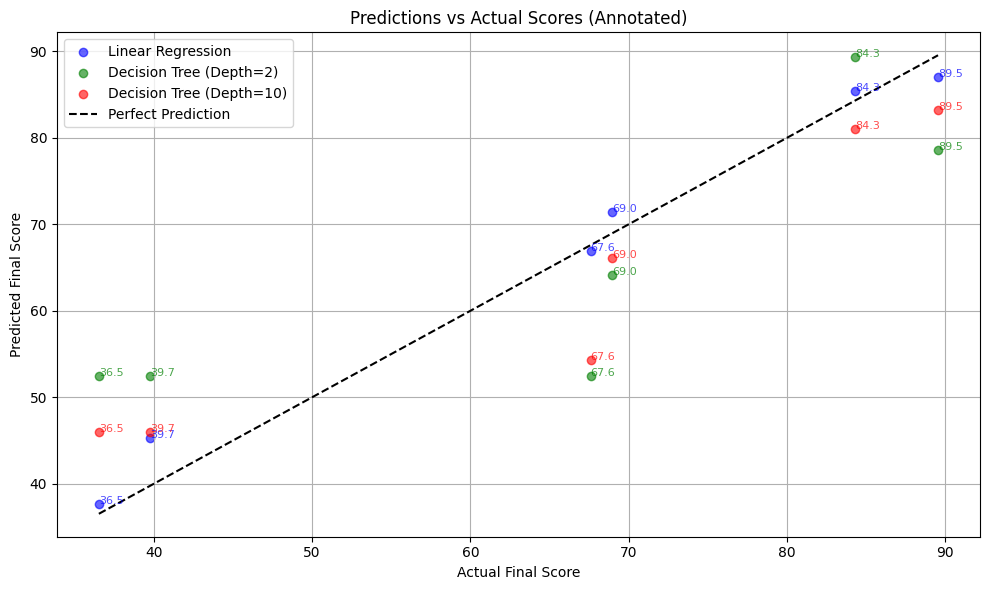

In [271]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_prediction, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_tree_pred, color='green', label='Decision Tree (Depth=2)', alpha=0.6)
plt.scatter(y_test, y_deep_pred, color='red', label='Decision Tree (Depth=10)', alpha=0.6)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')


for actual, pred_linare, pred_tree, pred_deep in zip(y_test, y_prediction, y_tree_pred, y_deep_pred):
    plt.text(actual, pred_linare, f'{actual:.1f}', fontsize=8, color='blue', alpha=0.7)
    plt.text(actual, pred_tree, f'{actual:.1f}', fontsize=8, color='green', alpha=0.7)
    plt.text(actual, pred_deep, f'{actual:.1f}', fontsize=8, color='red', alpha=0.7)


plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Predictions vs Actual Scores (Annotated)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 